In [2]:
# import library, pandas to read the dataset, matplotlib to visualize data.

from pandas import read_csv
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [59]:
import pandas as pd

#Collect and Explore The Data

df1 = pd.read_csv("results.csv")

#show  dataframe content

df1

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25295,25301,1069,854,210,47,16,16,16,16,0.0,54,\N,\N,36,16,1:41.395,195.737,12
25296,25302,1069,853,210,9,17,17,17,17,0.0,54,\N,\N,42,20,1:42.886,192.900,12
25297,25303,1069,4,214,14,19,\N,R,18,0.0,49,\N,\N,46,5,1:40.067,198.335,65
25298,25304,1069,839,214,31,11,\N,R,19,0.0,40,\N,\N,28,19,1:42.194,194.207,26


In [62]:
rows = df1.shape[0]
cols = df1.shape[1]

print("There are " + str(rows) + " rows and " + str(cols) + " columns in this dataframe.")

There are 25300 rows and 18 columns in this dataframe.


In [63]:
# explore the data type at each series
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25300 entries, 0 to 25299
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25300 non-null  int64  
 1   raceId           25300 non-null  int64  
 2   driverId         25300 non-null  int64  
 3   constructorId    25300 non-null  int64  
 4   number           25300 non-null  object 
 5   grid             25300 non-null  int64  
 6   position         25300 non-null  object 
 7   positionText     25300 non-null  object 
 8   positionOrder    25300 non-null  int64  
 9   points           25300 non-null  float64
 10  laps             25300 non-null  int64  
 11  time             25300 non-null  object 
 12  milliseconds     25300 non-null  object 
 13  fastestLap       25300 non-null  object 
 14  rank             25300 non-null  object 
 15  fastestLapTime   25300 non-null  object 
 16  fastestLapSpeed  25300 non-null  object 
 17  statusId    

In [25]:
#droping unused columns
df1.drop(labels=['statusId','rank','milliseconds','fastestLapSpeed','time'
                       ,'laps','points','positionOrder','positionText','position','grid','number','constructorId',    
                'raceId','resultId'],axis='columns', inplace=True)

In [33]:
df1

,driverId,fastestLap,fastestLapTime
0,1,39,1:27.452
1,2,41,1:27.739
2,3,41,1:28.090
3,4,58,1:28.603
4,5,43,1:27.418
...,...,...,...
25295,854,36,1:41.395
25296,853,42,1:42.886
25297,4,46,1:40.067
25298,839,28,1:42.194


In [40]:
X = df1.iloc[:,:20].values
y = df1.iloc[:,20:21].values
df1

,driverId,fastestLap,fastestLapTime
0,1,39,1:27.452
1,2,41,1:27.739
2,3,41,1:28.090
3,4,58,1:28.603
4,5,43,1:27.418
...,...,...,...
25295,854,36,1:41.395
25296,853,42,1:42.886
25297,4,46,1:40.067
25298,839,28,1:42.194


a histogram of the Sepal Length.

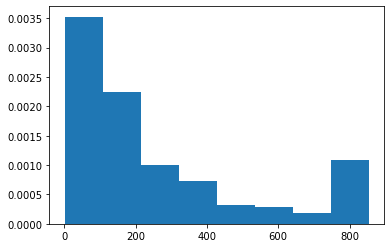

In [43]:
plt.hist(df1['driverId'],bins = 8, density=True);

 Seaborn library and plot the histogram of the Sepal Length

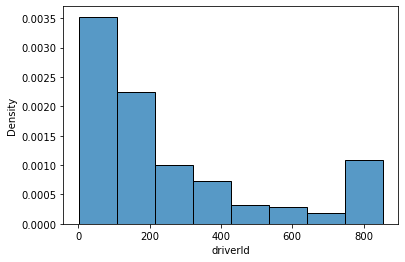

In [49]:
import seaborn as sns

sns.histplot(df1['driverId'], kde=False,bins=8, stat='density');

Kernel density estimation (KDE)

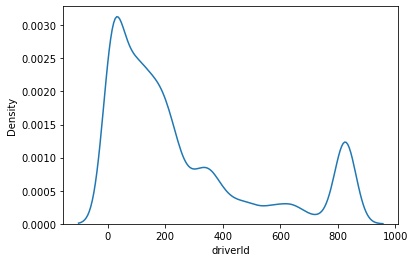

In [52]:
sns.kdeplot(df1['driverId']);

combine the histogram and kdeplot into one chart using a distplot()

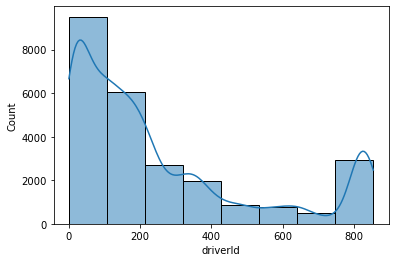

In [53]:
sns.histplot(df1['driverId'],bins=8, kde=True);

 Plots each numerical variable against each other. When it's comparing a value against itself, it creates a histogram or kde

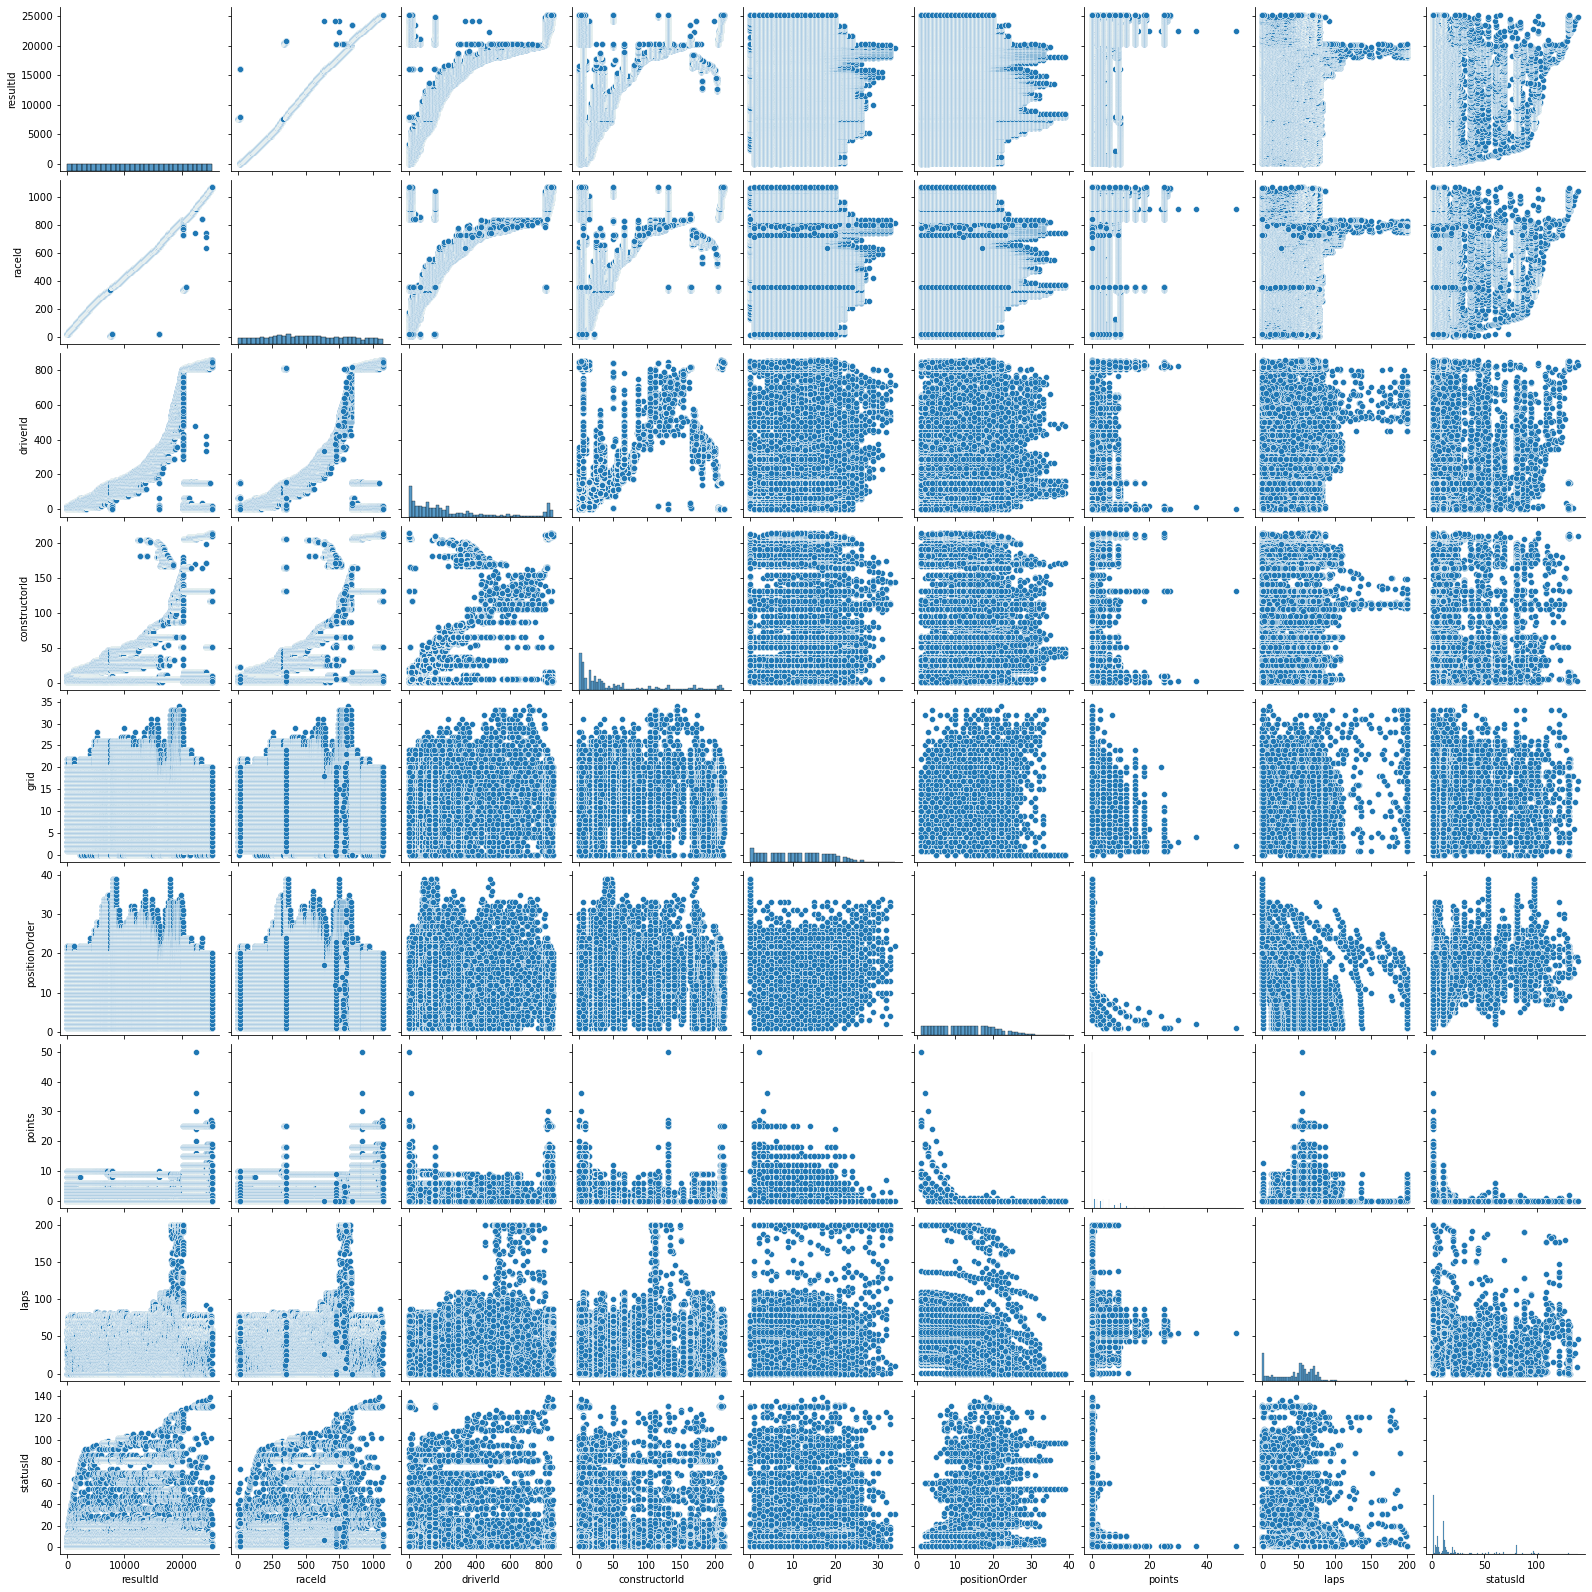

In [61]:
sns.pairplot(df1);